## circuiti_1

In [1]:
import numpy as np
import pandas as pd
import sys
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats 
sys.path.append("D:/Progetti/LabProgram")
from Routine import Routine
from Funnel import Funnel
from Funnel import FunnelSingle
from functions import linear_fit
import lab_utilities as lu

In [2]:
#Impost style
lu.setDefaultGraphStyle()

### Parte uno

misura resistenza interna voltometro

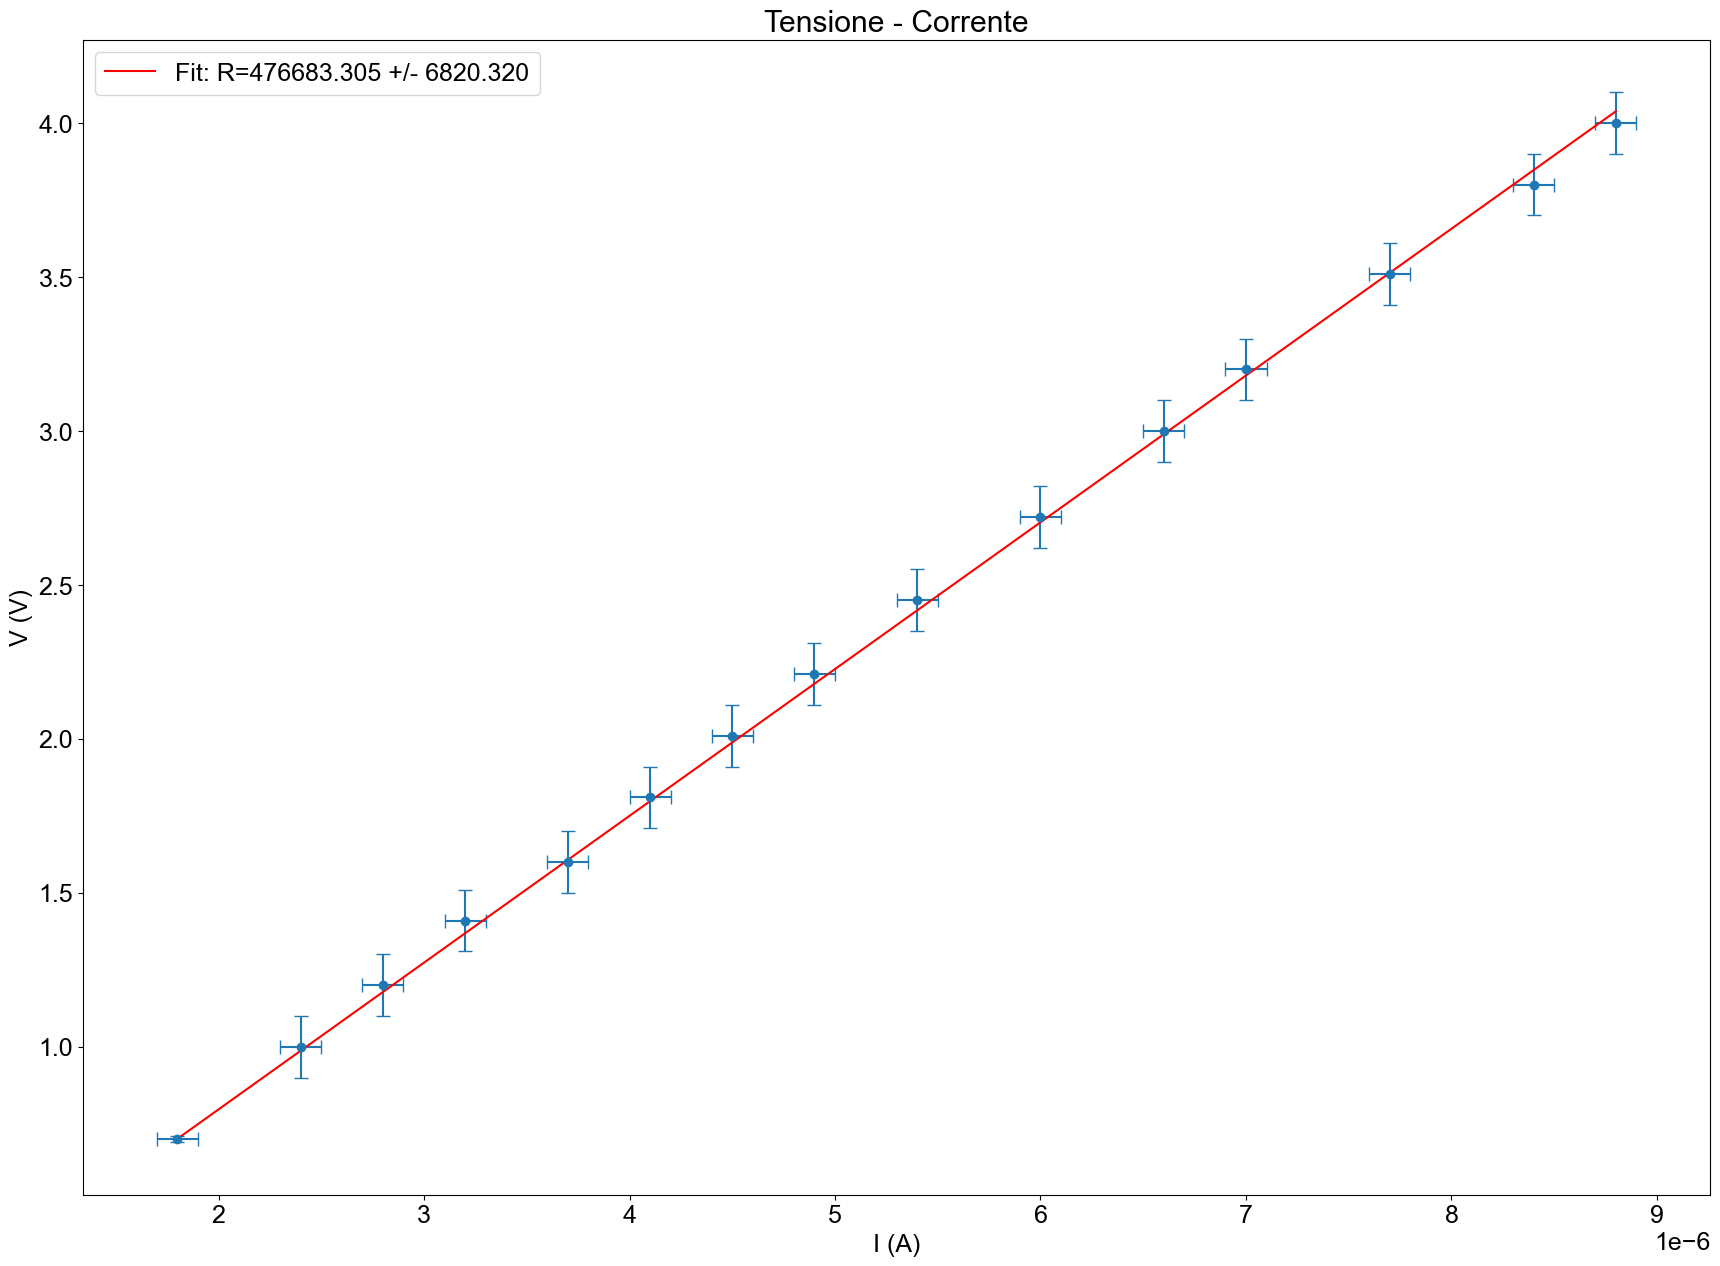

R=476683.305


In [3]:
R_usata = 2.999e6
sigma_R_usata = 0.001e6
datauno = pd.read_csv("data/parte_uno/vmisura_res_volmetro.csv")

V = datauno["V[V]"].values
I = datauno["I[muA]"].values / 1000000
sigma_V = datauno["sigma_V[V]"].values
sigma_I = datauno["sigma_I[muA]"].values / 1000000 # Convert microamps to amps


popt, pcov = curve_fit(linear_fit, I, V, sigma=sigma_V, absolute_sigma=True)

R_eq = popt[0]
delta_R = pcov[0, 0]**0.5
intercept = popt[1]

fit_line = linear_fit(I, R_eq, intercept)

plt.errorbar(I, V, xerr=sigma_I, yerr=sigma_V, fmt="o")
plt.plot(I, fit_line, color="red", label=f"Fit: R={R_eq:.3f} +/- {delta_R:.3f}")
plt.xlabel("I (A)")
plt.ylabel("V (V)")
plt.title("Tensione - Corrente")
plt.legend()
plt.show()

print(f"R={R_eq:.3f}")

In [4]:
#Resistenza Generatore
#R_V = 1/(1/R_eq - 1/R_usata)
R_V = (R_eq * R_usata) / (R_usata - R_eq)
print(f"R Voltometro={R_V/1000:.3f} kOhm")

R Voltometro=566.770 kOhm


In [11]:
#Calcolo giusto con solo un dato
R_usata_2 = 1.40e6
sigma_R_usata_2 = 0.01e6
V_misurato = 2.864
sigma_V_misurato = 0.005
I_misurata = 2.6e-6
sigma_I_misurata = 0.5e-6

R_eq_2 = (V_misurato / I_misurata)
err_R_eq_2 = np.sqrt((sigma_V_misurato**2 / I_misurata**2) + (V_misurato**2 * sigma_I_misurata**2 / I_misurata**4))
print(f"R_eq_2={R_eq_2:.3f} +/- {err_R_eq_2:.3f}")


R_volt = (R_eq_2 * R_usata_2) / (R_usata_2 - R_eq_2)
partial_Re = (R_usata_2 / (R_usata_2 - R_eq_2)) + ((R_eq_2 * R_usata_2) / (R_usata_2 - R_eq_2)**2)
partial_Ru = (R_eq_2 / (R_usata_2 - R_eq_2)) - ((R_eq_2 * R_usata_2) / (R_usata_2 - R_eq_2)**2)
err_R_volt = np.sqrt((partial_Re * err_R_eq_2)**2 + (partial_Ru * sigma_R_usata_2)**2)
print(f"R_volt={R_volt/1000:.3f} +/- {err_R_volt/1000:.3f} kOhm")

R_eq_2=1101538.462 +/- 211843.048
R_volt=5167.010 +/- 4663.145 kOhm


In [13]:
#calculate error percentage for current
I_misurata = 2.6e-6
sigma_I_misurata = 0.5e-6
err_I_misurata_perc = (sigma_I_misurata / I_misurata) * 100
print(f"err_I_misurata_perc={err_I_misurata_perc:.3f} %")

err_I_misurata_perc=19.231 %


In [6]:
print(R_Volt)

1101538.46153846


Misura resistenza interna Amperometro

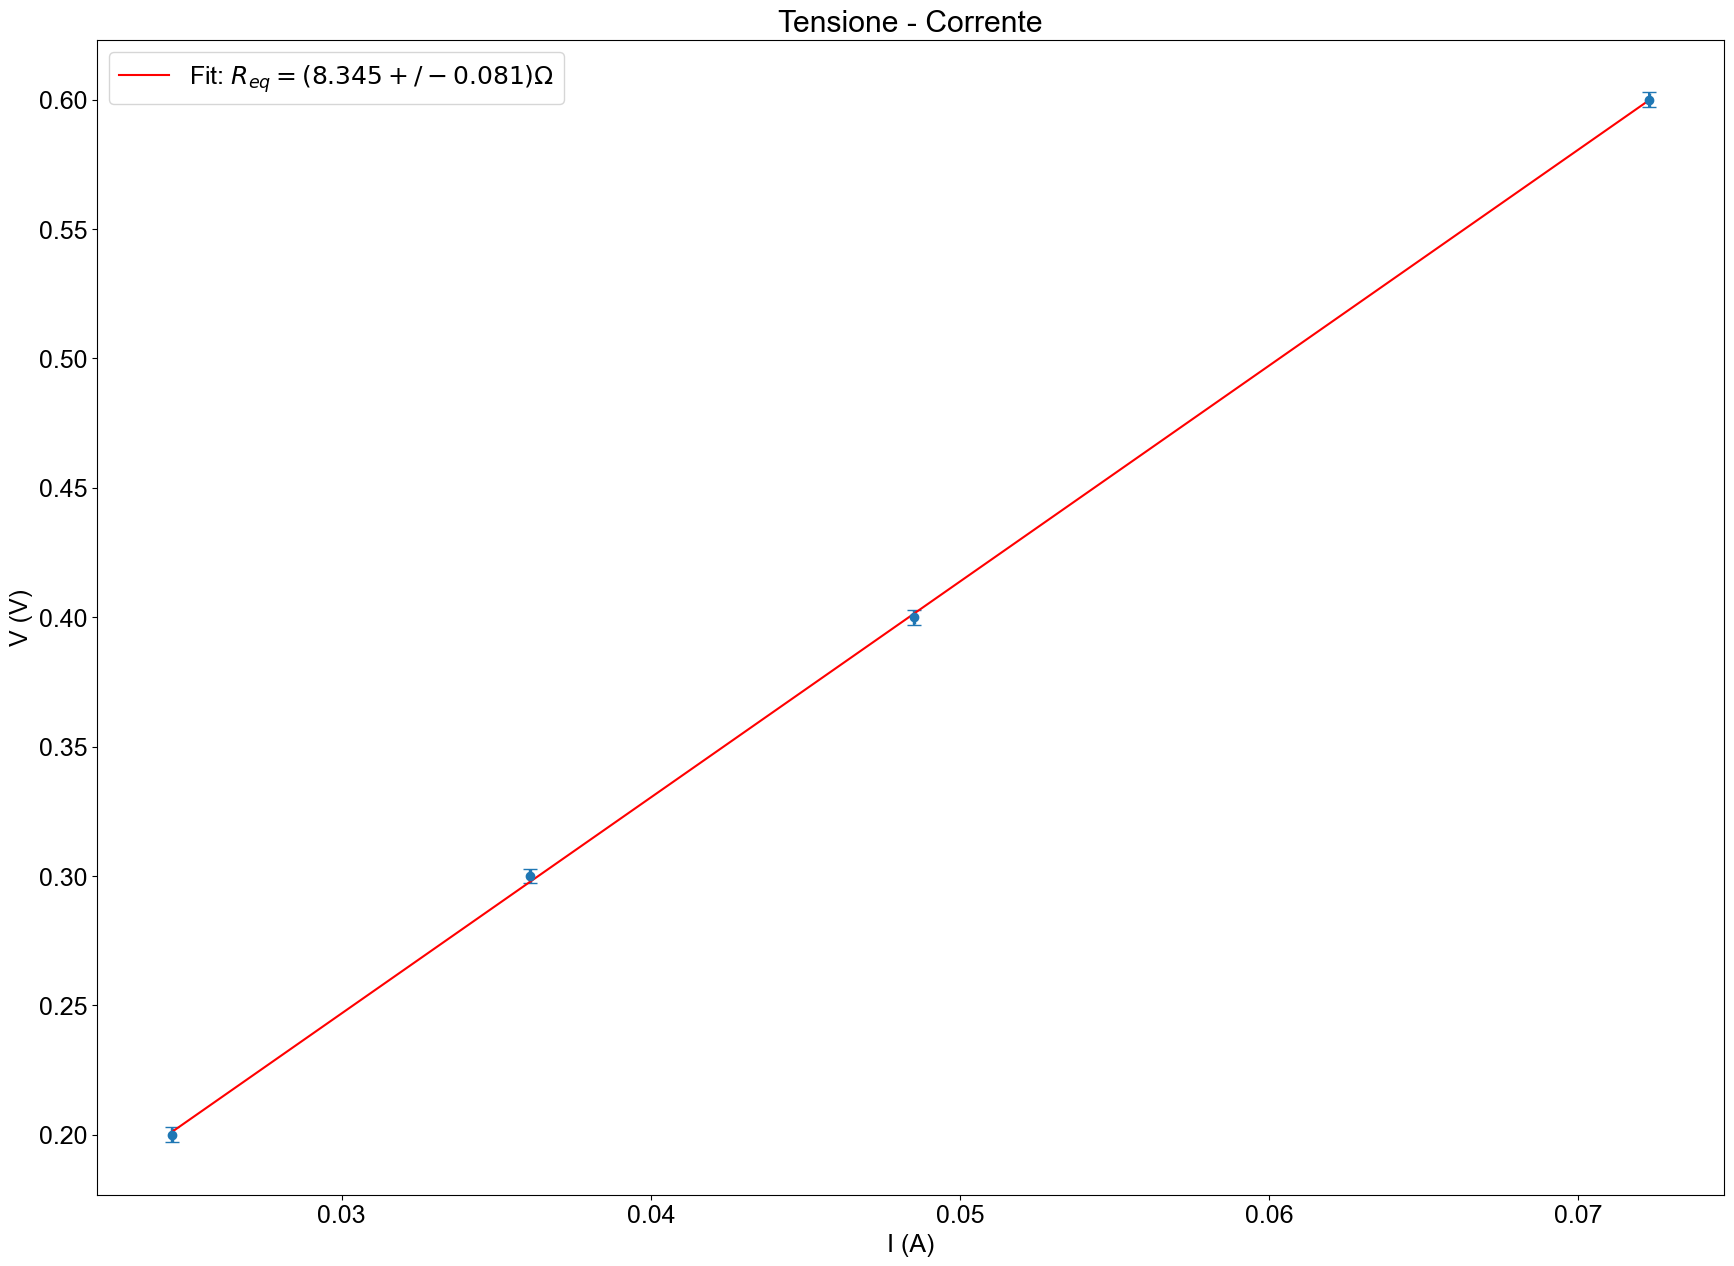

R=8.345


In [15]:
R_2 = 2.7
sigma_R_2 = 0.2

datauno_2 = pd.read_csv("data/parte_uno/misura_res_amperometro.csv")

V = datauno_2["V[V]"].values
I = datauno_2["I[mA]"].values / 1000
sigma_V = datauno_2["sigma_V[V]"].values / np.sqrt(12)
sigma_I = datauno_2["sigma_I[mA]"].values / 1000 / np.sqrt(12) # Convert microamps to amps


popt, pcov = curve_fit(linear_fit, I, V, sigma=sigma_V, absolute_sigma=True)

R_eq_2 = popt[0]
delta_R_2 = pcov[0, 0]**0.5
intercept_2 = popt[1]

fit_line = linear_fit(I, R_eq_2, intercept_2)

plt.errorbar(I, V, xerr=sigma_I, yerr=sigma_V, fmt="o")
amp_lable = f"Fit: " +r"$R_{eq}"+ f"=({R_eq_2:.3f} +/- {delta_R_2:.3f})" + r"\Omega$"
plt.plot(I, fit_line, color="red", label=amp_lable)
plt.xlabel("I (A)")
plt.ylabel("V (V)")
plt.title("Tensione - Corrente")
plt.legend()
plt.show()

print(f"R={R_eq_2:.3f}")

In [16]:
#export x and y of the above plot (with error) for ROOT
data_amp = pd.DataFrame({"I": I, "V": V, "sigma_I": sigma_I, "sigma_V": sigma_V})
data_amp.to_csv("data/parte_uno/fit_amp.csv", index=False)

In [8]:
chisq_amp, prob_amp = lu.chi2_fit_test(fit_line, V, sigma_V, 2)
print(f"Chi^2={chisq_amp:.3f}, p={prob_amp:.3f}")

Chi^2=0.075, p=0.963


In [17]:
#Calcolo R amperometro
R_eq_amp = 8.345
sigma_R_eq_amp = 0.082
R_usata_amp = 2.7
sigma_R_usata_amp = 0.2

R_amp = R_eq_amp - R_usata_amp
err_R_amp = np.sqrt(sigma_R_eq_amp**2 + sigma_R_usata_amp**2)
print(f"R_amp={R_amp:.3f} +/- {err_R_amp:.3f}")

R_amp=5.645 +/- 0.216


### Verifica legge di Ohm

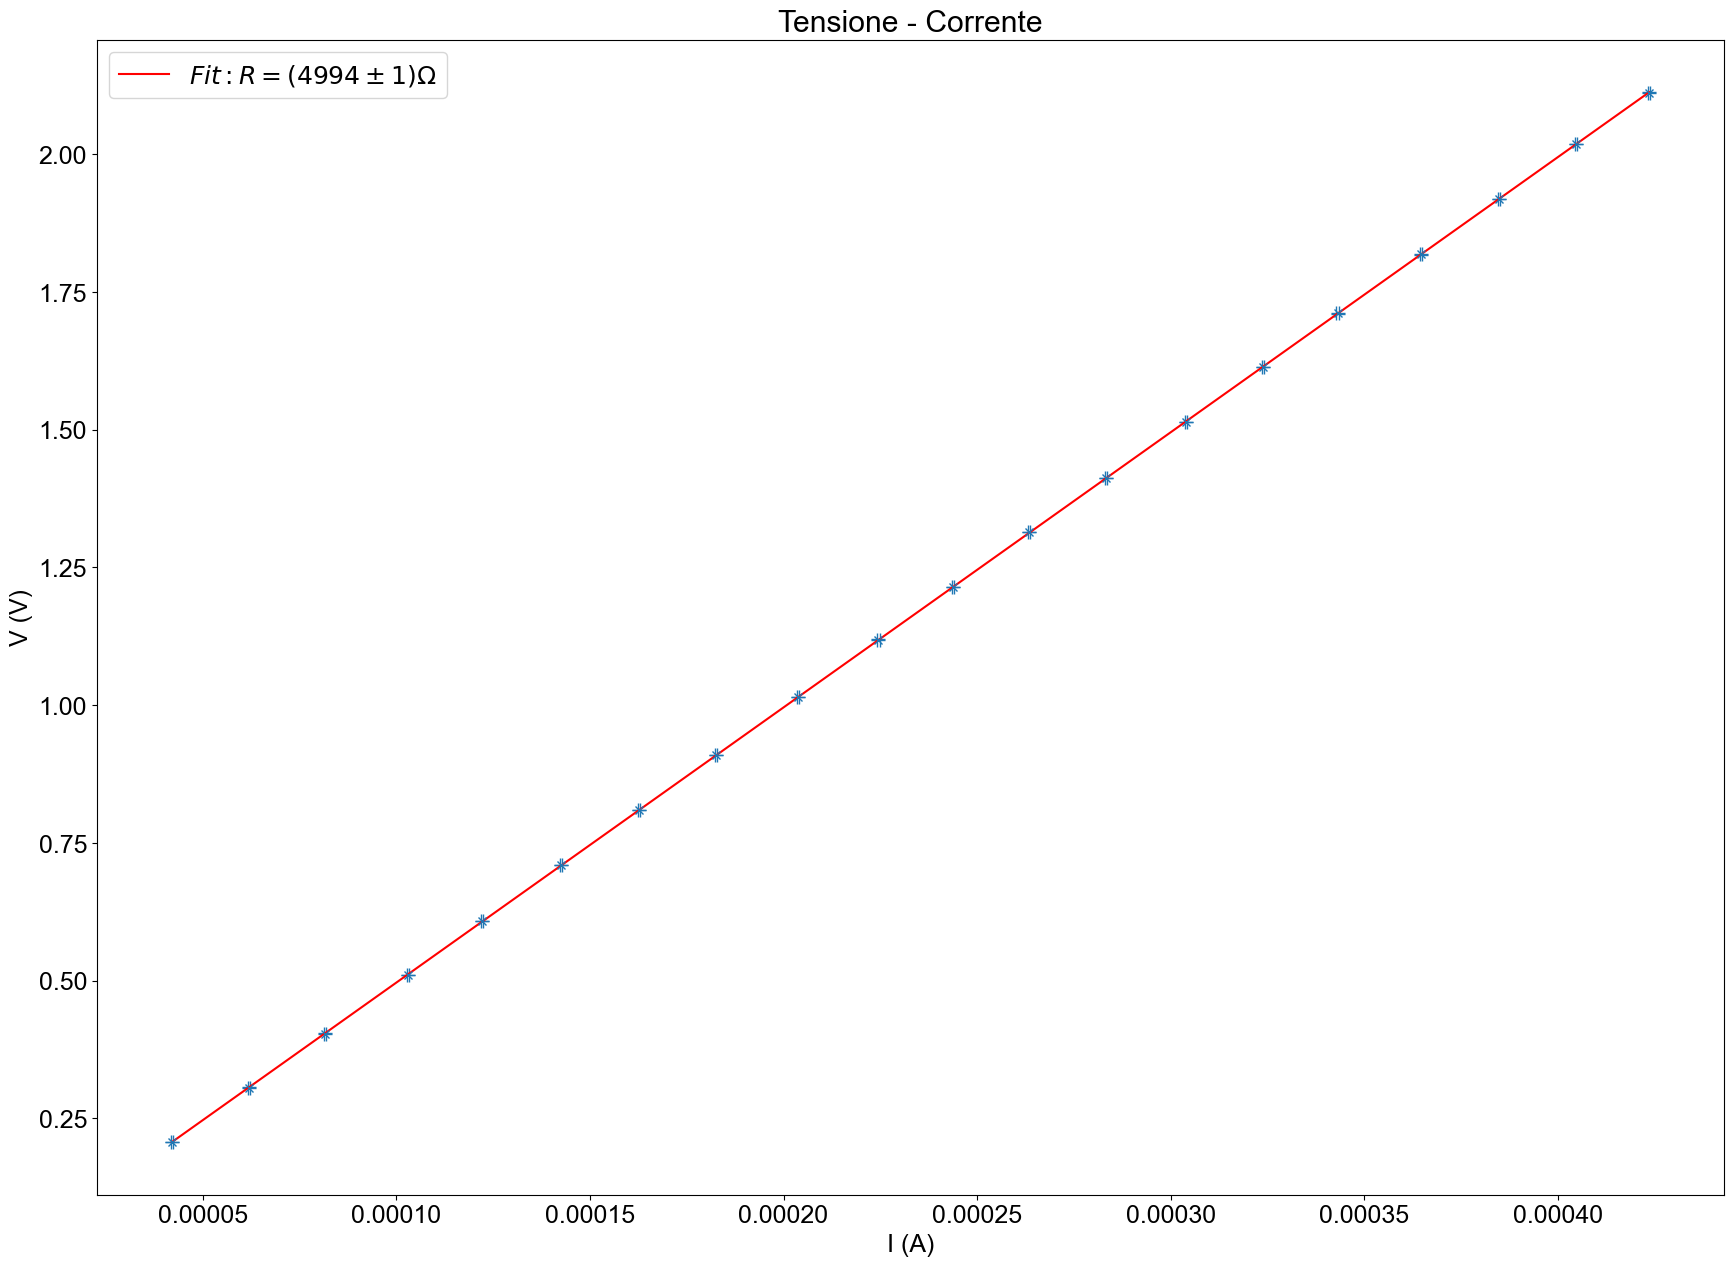

R=4993.783
Chi2=105.792
Prob=0.000%


In [18]:
R_misurata = 4.991e3
sigma_R_mis = 0.002

datauno_3 = pd.read_csv("data/parte_uno/verifica_ohm.csv")

V_3 = datauno_3["V[V]"].values
I_3 = datauno_3["I[muA]"].values / 1000000
sigma_V_3 = datauno_3["sigma_V[V]"].values / np.sqrt(12)
sigma_I_3 = datauno_3["sigma_I[muA]"].values / 1000000 / np.sqrt(12) # Convert microamps to amps


popt_3, pcov_3 = curve_fit(linear_fit, I_3, V_3, sigma=sigma_V_3, absolute_sigma=True)

R_eq_3 = popt_3[0]
delta_R_3 = pcov_3[0, 0]**0.5
intercept_3 = popt_3[1]

fit_line_3 = linear_fit(I_3, R_eq_3, intercept_3)

dof_ohm = len(V_3)-2
chi_sq_ohm , prob_ohm = lu.chi2_fit_test(fit_line_3, V_3, sigma_V_3, dof_ohm)

plt.errorbar(I_3, V_3, xerr=sigma_I_3, yerr=sigma_V_3, fmt="x")
label_ohm = r"$" + f"Fit: R= ({R_eq_3:.0f}" + r"\pm" + f"{delta_R_3:.0f})" + r"\Omega$"
plt.plot(I_3, fit_line_3, color="red", label=label_ohm)
plt.xlabel("I (A)")
plt.ylabel("V (V)")
plt.title("Tensione - Corrente")
plt.legend()
plt.show()

print(f"R={R_eq_3:.3f}")
print(f"Chi2={chi_sq_ohm:.3f}")
print(f"Prob={prob_ohm*100:.3f}%")

In [19]:
#export x and y of the above plot (with error) for ROOT
data_ohm = pd.DataFrame({"I": I_3, "V": V_3, "sigma_I": sigma_I_3, "sigma_V": sigma_V_3})
data_ohm.to_csv("data/parte_uno/fit_ohm.csv", index=False)

t-test

In [21]:
from scipy.stats import norm

In [24]:
R_fit_ohm = 4.994e3
sigma_R_fit_ohm = 0.003e3
R_mis_ohm = 4.991e3
sigma_R_mis_ohm = 0.002e3

t = (R_fit_ohm - R_mis_ohm) / np.sqrt(sigma_R_fit_ohm**2 + sigma_R_mis_ohm**2)
p_value =  (1 - norm.cdf(abs(t)))

print(f"t={t:.3f}")
print(f"p_value={p_value:.3f}")

t=0.832
p_value=0.203


In [12]:
z = lu.z_test(R_eq_3, R_misurata, delta_R_3, sigma_R_mis)
print(f"z={z:.3f}")

z=1.445


### Resistenze in serie e parallelo

#### Parallelo

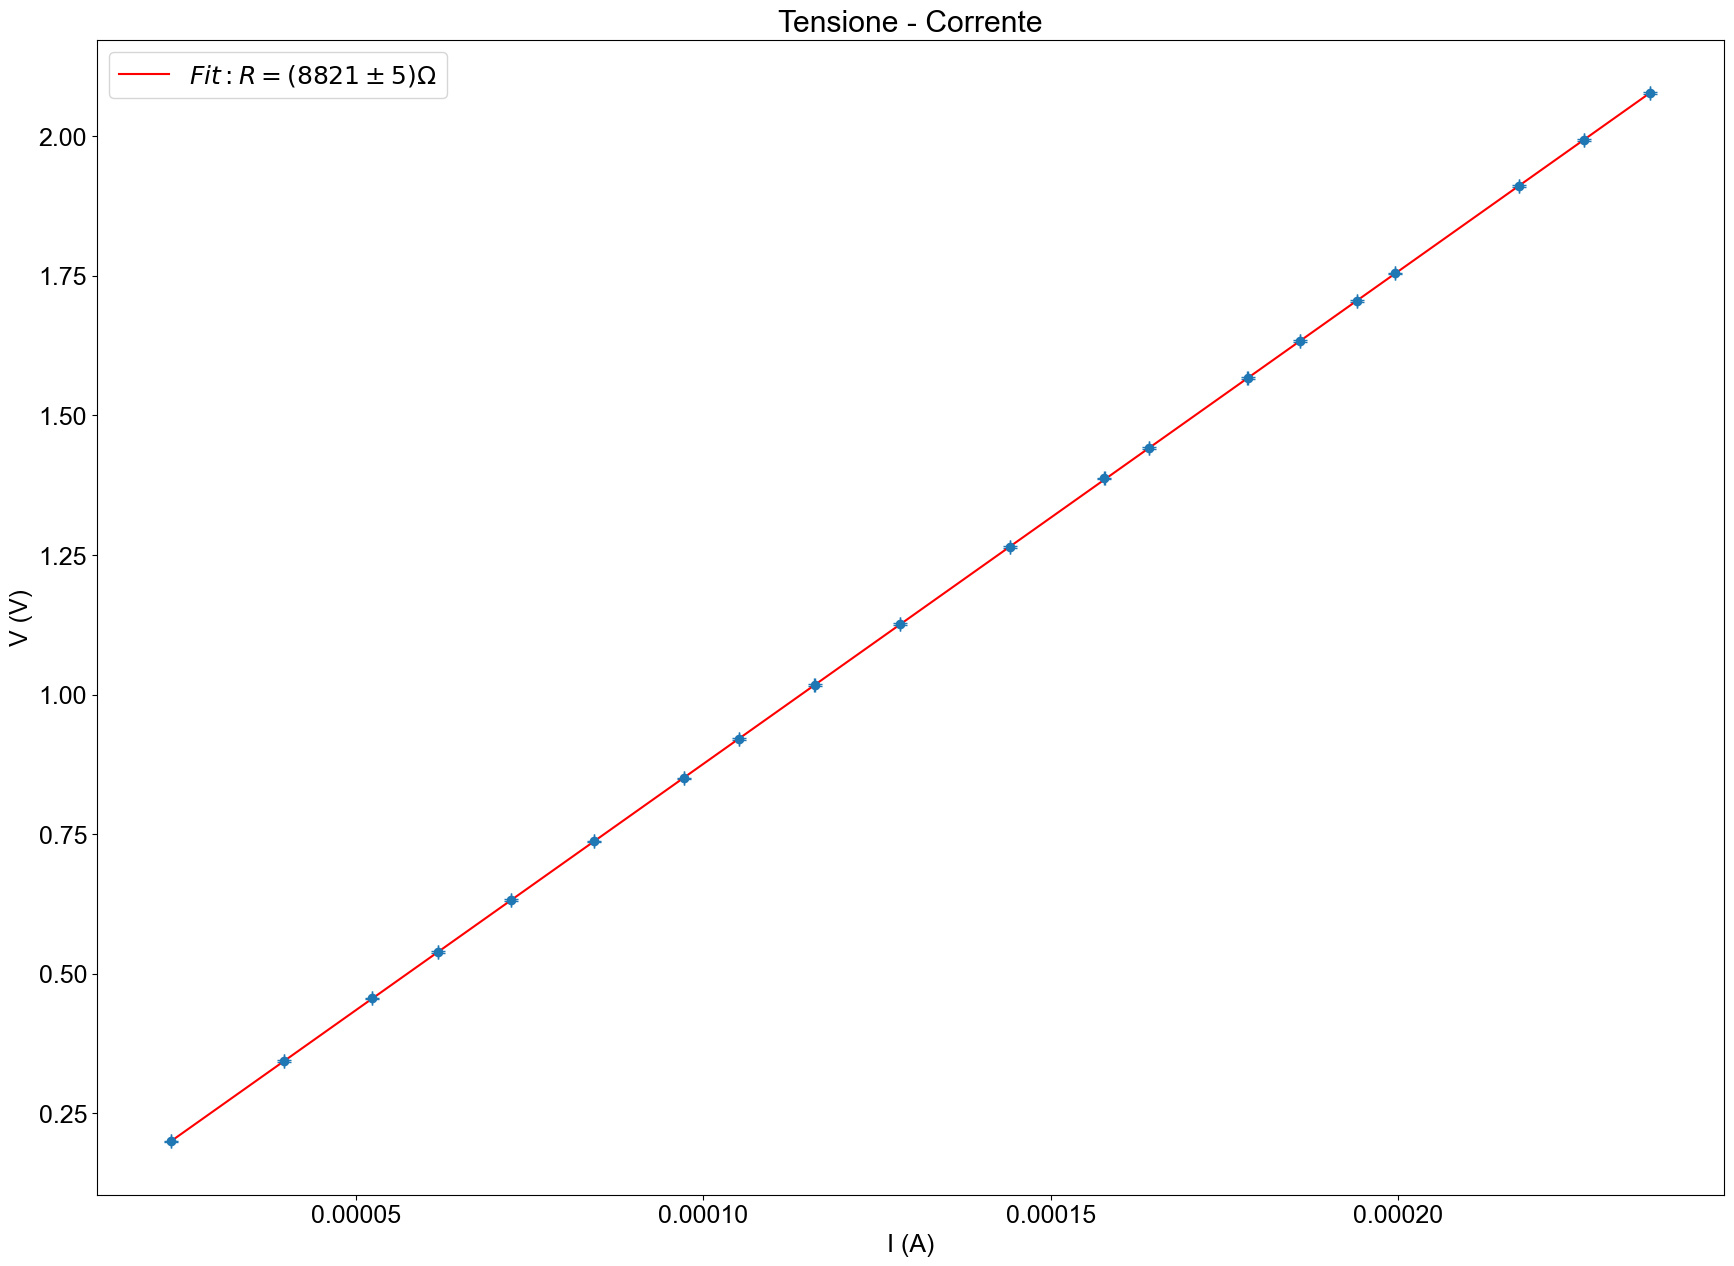

Chi2=4.631
Prob=99.933%
5.043031723806946


In [25]:
R_1 = 21.75*1000
R_2 = 14.81*1000
sigma_Rs = 0.01 * 1000

#Fare fit e confrontare con valore atteso (in parallelo)
data_parallelo = pd.read_csv("data/parte_uno/resistenze_parallelo.csv")

V_p = data_parallelo["V[V]"].values
I_p = data_parallelo["I[muA]"].values / 1e6
sigma_V_p = data_parallelo["sigma_V[V]"].values / np.sqrt(12)
sigma_I_p = data_parallelo["sigma_I[muA]"].values / 1e6 / np.sqrt(12) # Convert microamps to amps

popt_p, pcov_p = curve_fit(linear_fit, I_p, V_p, sigma=sigma_V_p, absolute_sigma=True)

R_eq_p = popt_p[0]
delta_R_p = pcov_p[0, 0]**0.5
intercept_p = popt_p[1]

fit_line_p = linear_fit(I_p, R_eq_p, intercept_p)

dof_ohm_p = len(V_p)-2
chi_sq_ohm_p , prob_ohm_p = lu.chi2_fit_test(fit_line_p, V_p, sigma_V_p, dof_ohm_p)
#manually calculate chi2
chi_test = np.sum(((V_p - fit_line_p)/sigma_V_p)**2)

plt.errorbar(I_p, V_p, xerr=sigma_I_p, yerr=sigma_V_p, fmt="o")
label_ohm_p = r"$" + f"Fit: R= ({R_eq_p:.0f}" + r"\pm" + f"{delta_R_p:.0f})" + r"\Omega$"
plt.plot(I_p, fit_line_p, color="red", label=label_ohm_p)
plt.xlabel("I (A)")
plt.ylabel("V (V)")
plt.title("Tensione - Corrente")
plt.legend()
plt.show()

print(f"Chi2={chi_sq_ohm_p:.3f}")
print(f"Prob={prob_ohm_p*100:.3f}%")
print(delta_R_p)

In [26]:
#export x and y of the above plot (with error) for ROOT
data_parallelo = pd.DataFrame({"I": I_p, "V": V_p, "sigma_I": sigma_I_p, "sigma_V": sigma_V_p})
data_parallelo.to_csv("data/parte_uno/fit_parallelo.csv", index=False)

In [28]:
#R_eq measured
R1_meas = 21.75e3
R2_meas =  14.81e3
sigma_R1_meas = 0.01e3
sigma_R2_meas = 0.01e3

R_eq_meas = 1/(1/R1_meas + 1/R2_meas)

term1 = (sigma_R1_meas / (R1_meas**2 * (1/R1_meas + 1/R2_meas)**2))**2
term2 = (sigma_R2_meas / ((1/R1_meas + 1/R2_meas)**2 * R2_meas**2))**2

sigma_Req = np.sqrt(term1 + term2)

print(f"R_eq = {R_eq_meas:.3f} +- {sigma_Req:.3f}")

R_eq = 8810.654 +- 3.901


In [29]:
#z test
R_fit_par = 8.821e3
sigma_R_fit_par = 0.005e3

t = (R_fit_par - R_eq_meas) / np.sqrt(sigma_R_fit_par**2 + sigma_Req**2)
p_value =  (1 - norm.cdf(abs(t)))

print(f"t={t:.3f}")
print(f"p_value={p_value:.3f}")

t=1.631
p_value=0.051


In [31]:
#experiment

a = 4.43
b = 2.1
c = 1.5

print(a/b/c)
print((a/b)/c)

1.406349206349206
1.406349206349206


#### Serie

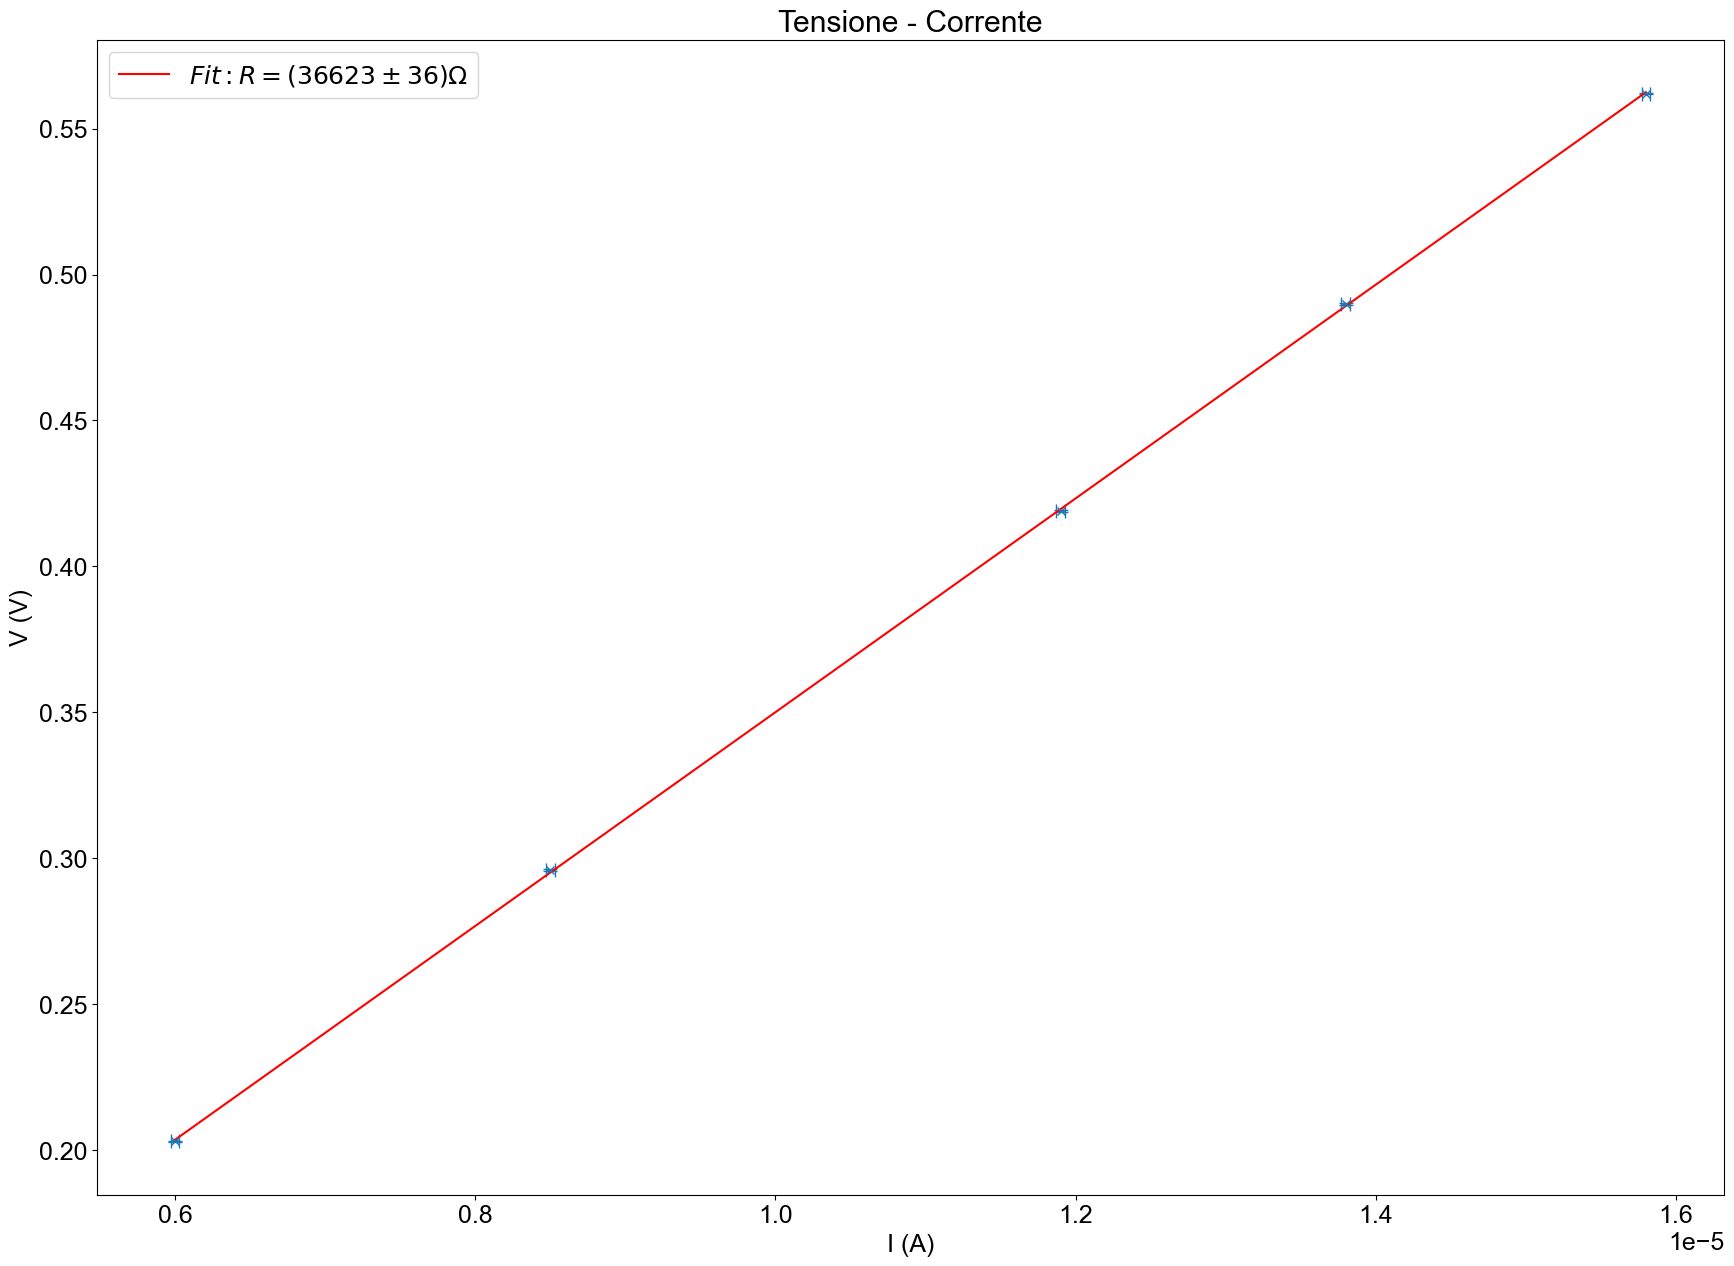

Chi2=27.869
Prob=0.000%


In [32]:
#Fare fit e confrontare con valore atteso (in Serie)
data_serie = pd.read_csv("data/parte_uno/resistenze_serie.csv")

V_s = data_serie["V[V]"].values
I_s = data_serie["I[muA]"].values / 1000000
sigma_V_s = data_serie["sigma_V[V]"].values / np.sqrt(12)
sigma_I_s = data_serie["sigma_I[muA]"].values / 1000000 / np.sqrt(12) # Convert microamps to amps

popt_s, pcov_s = curve_fit(linear_fit, I_s, V_s, sigma=sigma_V_s, absolute_sigma=True)

R_eq_s = popt_s[0]
delta_R_s = pcov_s[0, 0]**0.5
intercept_s = popt_s[1]

fit_line_s = linear_fit(I_s, R_eq_s, intercept_s)

dof_ohm_s = len(V_s)-2
chi_sq_ohm_s , prob_ohm_s = lu.chi2_fit_test(fit_line_s, V_s, sigma_V_s, dof_ohm_s)

plt.errorbar(I_s, V_s, xerr=sigma_I_s, yerr=sigma_V_s, fmt="x")
label_ohm_s = r"$" + f"Fit: R= ({R_eq_s:.0f}" + r"\pm" + f"{delta_R_s:.0f})" + r"\Omega$"
plt.plot(I_s, fit_line_s, color="red", label=label_ohm_s)
plt.xlabel("I (A)")
plt.ylabel("V (V)")
plt.title("Tensione - Corrente")
plt.legend()
plt.show()

print(f"Chi2={chi_sq_ohm_s:.3f}")
print(f"Prob={prob_ohm_s*100:.3f}%")

In [33]:
#export x and y of the above plot (with error) for ROOT
data_serie = pd.DataFrame({"I": I_s, "V": V_s, "sigma_I": sigma_I_s, "sigma_V": sigma_V_s})
data_serie.to_csv("data/parte_uno/fit_serie.csv", index=False)

In [34]:
#z test
R_fit_ser = 36.62e3
sigma_R_fit_ser = 0.005e3
R_eq_ser = 36.56e3
sigma_R_eq_ser = 0.02e3

t = (R_fit_ser - R_eq_ser) / np.sqrt(sigma_R_fit_ser**2 + sigma_R_eq_ser**2)
p_value =  (1 - norm.cdf(abs(t)))

print(f"t={t:.3f}")
print(f"p_value={p_value:.3f}")

t=2.910
p_value=0.002


## Parte due

In [17]:
R_load_1 = 468.2e3
R_load_2 = 466.0e3

## Parte tre

In [37]:
def shockley_fun(V, I_0, g, T):
    q=1.6e-19
    k=1.38e-23
    return I_0 * (np.exp((q*V)/(k*g*T))-1)


In [38]:
def dummy_shockley_fun(V, I_0, g):
    q=1.6e-19
    k=1.38e-23
    T = 300
    return I_0 * (np.exp((q*V)/(k*g*T))-1)


In [47]:
#Calcola derivate tra coppie valori per trovare resistenza diodo in quell'intervallo
dati_diodo = pd.read_csv("data/parte_tre/misure_diodo.csv")
V_ds = dati_diodo['V[V]'].to_list()
V_ds_error = dati_diodo['sigma_V[V]'].to_list()
V_ds_error = [V_ds_err / np.sqrt(12) for V_ds_err in V_ds_error]
I_ds = dati_diodo['I[muA]'].to_list()
I_ds = [i_d / 1000000 for i_d in I_ds]
I_ds_error = dati_diodo['sigma_I[muA]'].to_list()
I_ds_error = [I_ds_err / 1000000 / np.sqrt(12) for I_ds_err in I_ds_error]

R_diodo = [(V_ds[i+1]-V_ds[i]) / (I_ds[i+1] - I_ds[i]) for i in range(6, len(V_ds)-1)]

In [48]:
# export x and y of the above plot (with error) for ROOT
#in order: V, I, sigma_V, sigma_I
data_diodo = pd.DataFrame({"V": V_ds, "I": I_ds, "sigma_V": V_ds_error, "sigma_I": I_ds_error})
data_diodo.to_csv("data/parte_tre/fit_diodo.csv", index=False)

In [46]:
#dummy fit with T set as 300k to find initial guess values for I_0 and g
dummy_popt_d, dummy_pcov_d = curve_fit(dummy_shockley_fun, V_ds, I_ds, sigma=I_ds_error, absolute_sigma=True, maxfev=5000, p0=[0.1, 1])
initial_I0, initial_g = dummy_popt_d
print(f"Initial I0={initial_I0}")
print(f"Initial g={initial_g:.6f}")
print(f"Initial T=300")

#write them in {I0, g, T} format for ROOT
print(f"{{ {initial_I0}, {initial_g}, 300 }}")

Initial I0=3.1641904805591094e-10
Initial g=1.583911
Initial T=300
{ 3.1641904805591094e-10, 1.5839107920445419, 300 }


3.1642242118345884e-10 1.584069882930596 299.97004156024735
[136.6906474820142, 49.350649350649405, 36.92307692307695, 29.545454545454582, 19.11764705882354, 14.9122807017544, 8.695652173913052, 6.614785992217861, 3.921568627450984, 3.5634743875278434, 1.6509433962264164, 2.1951219512195146, 1.2500000000000016, 0.9523809523809529, 0.7643312101910839, 0.748299319727892, 0.5142857142857147, 0.45936395759717347, 0.1973094170403584, 0.441176470588236, 0.1012658227848102]


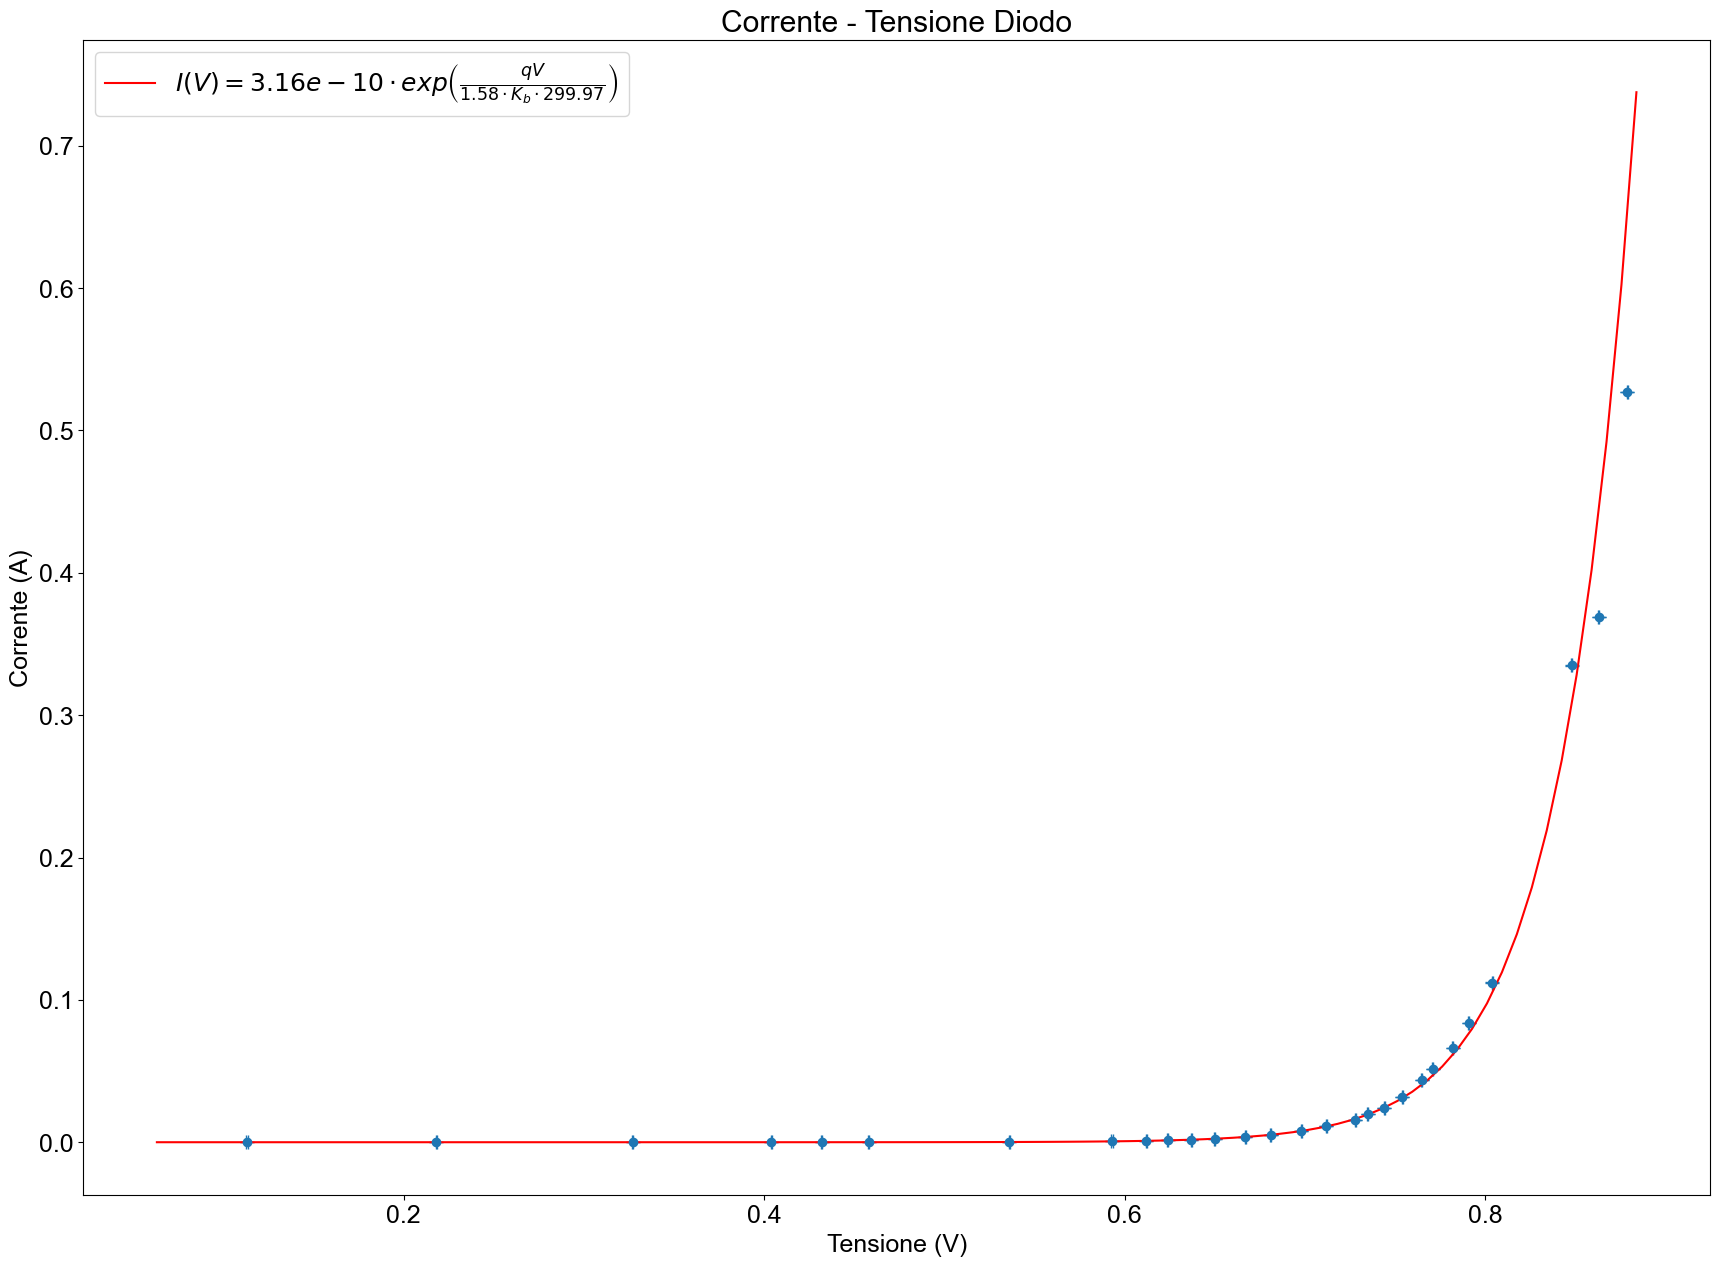

In [41]:
#Fit
p0 = [initial_I0, initial_g , 300] #Initial parameter guess
popt_d, pcov_d = curve_fit(shockley_fun, V_ds, I_ds, sigma=I_ds_error, absolute_sigma=True, maxfev=5000, p0=p0)

I_0 = popt_d[0]
g = popt_d[1]
T = popt_d[2]
print(I_0,g, T)

V_Shockley = np.linspace(min(V_ds)-0.05, max(V_ds)+0.005, 100)
I_Shockley = shockley_fun(V_Shockley, I_0, g, T)

plt.errorbar(V_ds, I_ds, xerr=V_ds_error, yerr=I_ds_error, fmt="o")
shockley_lable = r'$I(V) = ' + str("{:.2e}".format(I_0)) + r'\cdot exp\left(\frac{qV}{' + str(round(g,2)) + r'\cdot K_b \cdot' + str(round(T,2)) + r'}\right)$'
plt.plot(V_Shockley, I_Shockley, color="red", label=shockley_lable)
plt.title("Corrente - Tensione Diodo")
plt.xlabel("Tensione (V)")
plt.ylabel("Corrente (A)")
plt.legend()
print(R_diodo)

In [40]:
#calculate chi2
dof_diodo = len(V_ds)-3
I_s_hyp = [shockley_fun(V_ds[i], I_0, g, T) for i in range(len(V_ds))]
chi_sq_diodo, prob_diodo = lu.chi2_fit_test(I_s_hyp, I_ds, I_ds_error, dof_diodo)
print(f"Chi2={chi_sq_diodo:.3f}")
print(f"Prob={prob_diodo*100:.3f}%")

Chi2=48796.315
Prob=0.000%


Ora proviamo a fittare linearmente le ultime parti del grafico

In [23]:
def plot_linear_fits(current, voltage, current_err, voltage_err, N, m, stop):
    fig, ax = plt.subplots()
    
    # plot the data points
    ax.errorbar(current[10::], voltage[10::], xerr=current_err[10::], yerr=voltage_err[10::], fmt='.', color='blue')

    
    # iterate through the data starting from N and incrementing by m
    for i in range(N, stop, m):
        x_fit = current[i:] # use data starting from index i
        y_fit = voltage[i:]
        x_err = current_err[i:]
        y_err = voltage_err[i:]
        
        # perform a linear fit on the data using curve_fit from scipy
        fit_params, _ = curve_fit(linear_fit, x_fit, y_fit, sigma=y_err, absolute_sigma=True)
        
        #Calculate chi2
        hyps = [linear_fit(x, fit_params[0], fit_params[1]) for x in x_fit]
        dof = len(y_fit) - 2
        chi2, prob = lu.chi2_fit_test(hyps, y_fit, y_err, dof)
        # plot the fitted line
        x_plot = np.linspace(x_fit[0]-0.01, x_fit[-1]+0.01, num=100)
        label = r'$\chi^2 = ' + f'{chi2:.0f}' + r' \;|\; V_{min} = ' + f'{x_fit[0]:.2f}' + r'$'
        ax.plot(x_plot, linear_fit(x_plot, fit_params[0], fit_params[1]), label=label)
    
    ax.set_xlabel('Corrente (A)')
    ax.set_ylabel('Tensione (V)')
    ax.legend()
    ax.set_title('Tensione - Corrente Diodo')
    plt.show()

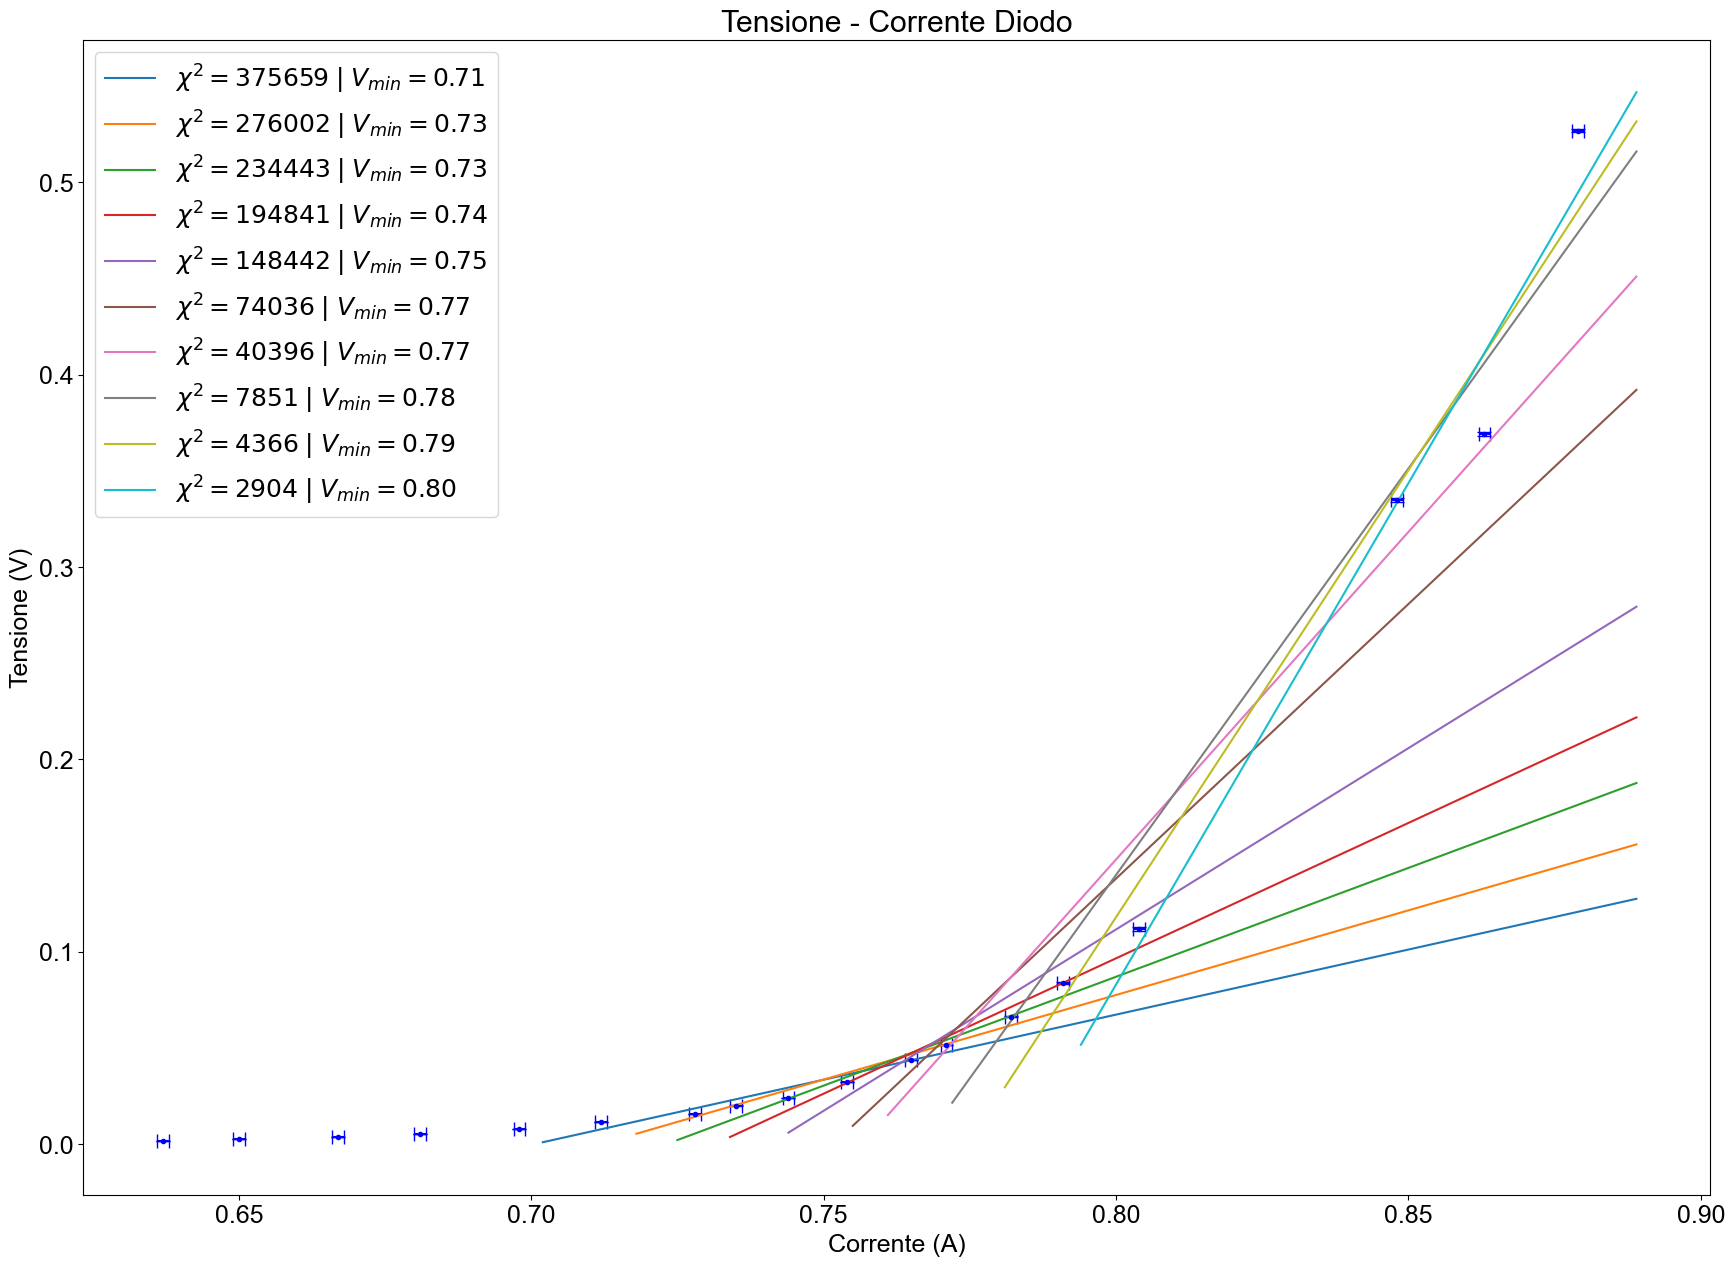

In [24]:
plot_linear_fits(V_ds, I_ds, V_ds_error, I_ds_error, 15, 1, len(V_ds) - 3)